In [1]:
# This is a notebook to train and evaluate everything in one notebook

In [2]:
from sklearn.model_selection import train_test_split
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, BatchNormalization, Activation, Dropout
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import sys
sys.path.insert(0, '../shared/')
from predict import Predict

In [3]:
# Specify the dataset path in dataset_path
dataset_path = "E:/COMP 597/Dataset/"

#
fog_path = dataset_path + 'Fog/'
night_path = dataset_path + 'Night/'
rain_path = dataset_path + 'Rain/'
snow_path = dataset_path + 'Snow/'
#


fog_validation_rgb = list(Path(fog_path + 'RGB/Fog_Validation').glob('*.png'))
fog_validation_annotated = list(Path(fog_path + 'Annotated/Validation').glob('*_gt_labelColor.png'))
fog_training_rgb, fog_test_rgb = train_test_split(list(Path(fog_path + 'RGB/Fog_Train').glob('*.png')), test_size=0.1)
fog_training_annotated = [y for x in fog_training_rgb for y in
                      list(Path(fog_path + 'Annotated/Train').glob('*_gt_labelColor.png'))
                      if x.name.strip('_rgb_anon.png') == y.name.strip('_gt_labelColor.png')]
fog_test_annotated = [y for x in fog_test_rgb for y in list(Path(fog_path + 'Annotated/Train').glob('*_gt_labelColor.png'))
                  if x.name.strip('_rgb_anon.png') == y.name.strip('_gt_labelColor.png')]
#

#
night_validation_rgb = list(Path(night_path + 'RGB/Night_Validation').glob('*.png'))
night_validation_annotated = list(Path(night_path + 'Annotated/Validation').glob('*_gt_labelColor.png'))
night_training_rgb, night_test_rgb = train_test_split(list(Path(night_path + 'RGB/Night_Train').glob('*.png')), test_size=0.1)
night_training_annotated = [y for x in night_training_rgb for y in
                      list(Path(night_path + 'Annotated/Train').glob('*_gt_labelColor.png'))
                      if x.name.strip('_rgb_anon.png') == y.name.strip('_gt_labelColor.png')]
night_test_annotated = [y for x in night_test_rgb for y in list(Path(night_path + 'Annotated/Train').glob('*_gt_labelColor.png'))
                  if x.name.strip('_rgb_anon.png') == y.name.strip('_gt_labelColor.png')]
#

#
rain_validation_rgb = list(Path(rain_path + 'RGB/Rain_Validation').glob('*.png'))
rain_validation_annotated = list(Path(rain_path + 'Annotated/Validation').glob('*_gt_labelColor.png'))
rain_training_rgb, rain_test_rgb = train_test_split(list(Path(rain_path + 'RGB/Rain_Train').glob('*.png')), test_size=0.1)
rain_training_annotated = [y for x in rain_training_rgb for y in
                      list(Path(rain_path + 'Annotated/Train').glob('*_gt_labelColor.png'))
                      if x.name.strip('_rgb_anon.png') == y.name.strip('_gt_labelColor.png')]
rain_test_annotated = [y for x in rain_test_rgb for y in list(Path(rain_path + 'Annotated/Train').glob('*_gt_labelColor.png'))
                  if x.name.strip('_rgb_anon.png') == y.name.strip('_gt_labelColor.png')]
#

#
snow_validation_rgb = list(Path(snow_path + 'RGB/Snow_Validation').glob('*.png'))
snow_validation_annotated = list(Path(snow_path + 'Annotated/Validation').glob('*_gt_labelColor.png'))
snow_training_rgb, snow_test_rgb = train_test_split(list(Path(snow_path + 'RGB/Snow_Train').glob('*.png')), test_size=0.1)
snow_training_annotated = [y for x in snow_training_rgb for y in
                      list(Path(snow_path + 'Annotated/Train').glob('*_gt_labelColor.png'))
                      if x.name.strip('_rgb_anon.png') == y.name.strip('_gt_labelColor.png')]
snow_test_annotated = [y for x in snow_test_rgb for y in list(Path(snow_path + 'Annotated/Train').glob('*_gt_labelColor.png'))
                  if x.name.strip('_rgb_anon.png') == y.name.strip('_gt_labelColor.png')]


#
fog_test_set = list(Path(fog_path + 'RGB/Fog_Test').glob('*.png'))
night_test_set = list(Path(night_path + 'RGB/Night_Test').glob('*.png'))
rain_test_set = list(Path(rain_path + 'RGB/Rain_Test').glob('*.png'))
snow_test_set = list(Path(snow_path + 'RGB/Snow_Test').glob('*.png'))



In [4]:
image_size = (256, 256)

#
fog_training_duo = [(x, y) for x, y in zip(fog_training_rgb, fog_training_annotated)]
fog_testing_duo = [(x, y) for x, y in zip(fog_test_rgb, fog_test_annotated)]
fog_validation_duo = [(x, y) for x, y in zip(fog_validation_rgb, fog_validation_annotated)]
#

#
night_training_duo = [(x, y) for x, y in zip(night_training_rgb, night_training_annotated)]
night_testing_duo = [(x, y) for x, y in zip(night_test_rgb, night_test_annotated)]
night_validation_duo = [(x, y) for x, y in zip(night_validation_rgb, night_validation_annotated)]
#

#
rain_training_duo = [(x, y) for x, y in zip(rain_training_rgb, rain_training_annotated)]
rain_testing_duo = [(x, y) for x, y in zip(rain_test_rgb, rain_test_annotated)]
rain_validation_duo = [(x, y) for x, y in zip(rain_validation_rgb, rain_validation_annotated)]
#

#
snow_training_duo = [(x, y) for x, y in zip(snow_training_rgb, snow_training_annotated)]
snow_testing_duo = [(x, y) for x, y in zip(snow_test_rgb, snow_test_annotated)]
snow_validation_duo = [(x, y) for x, y in zip(snow_validation_rgb, snow_validation_annotated)]
#

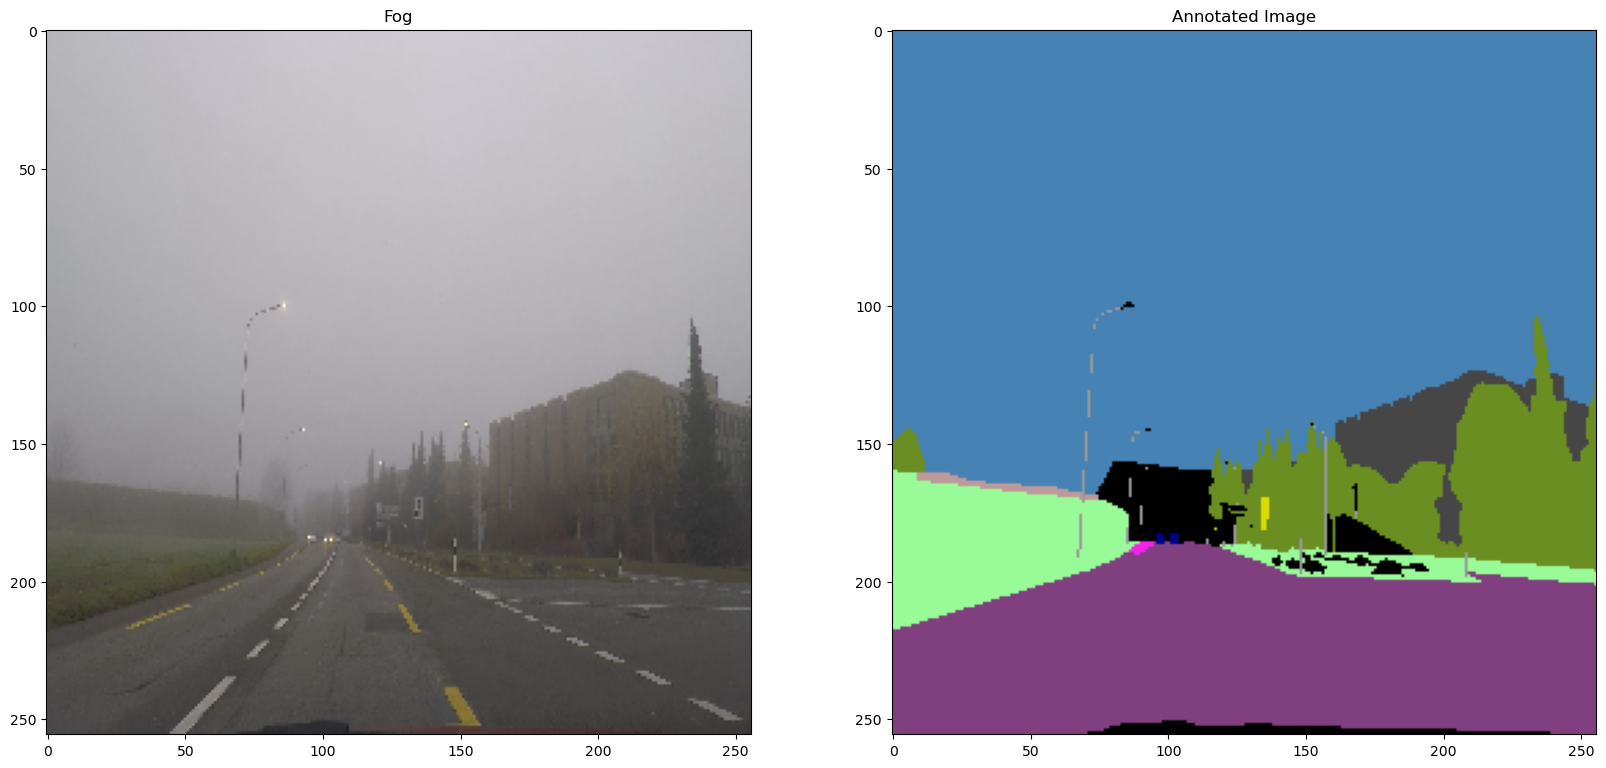

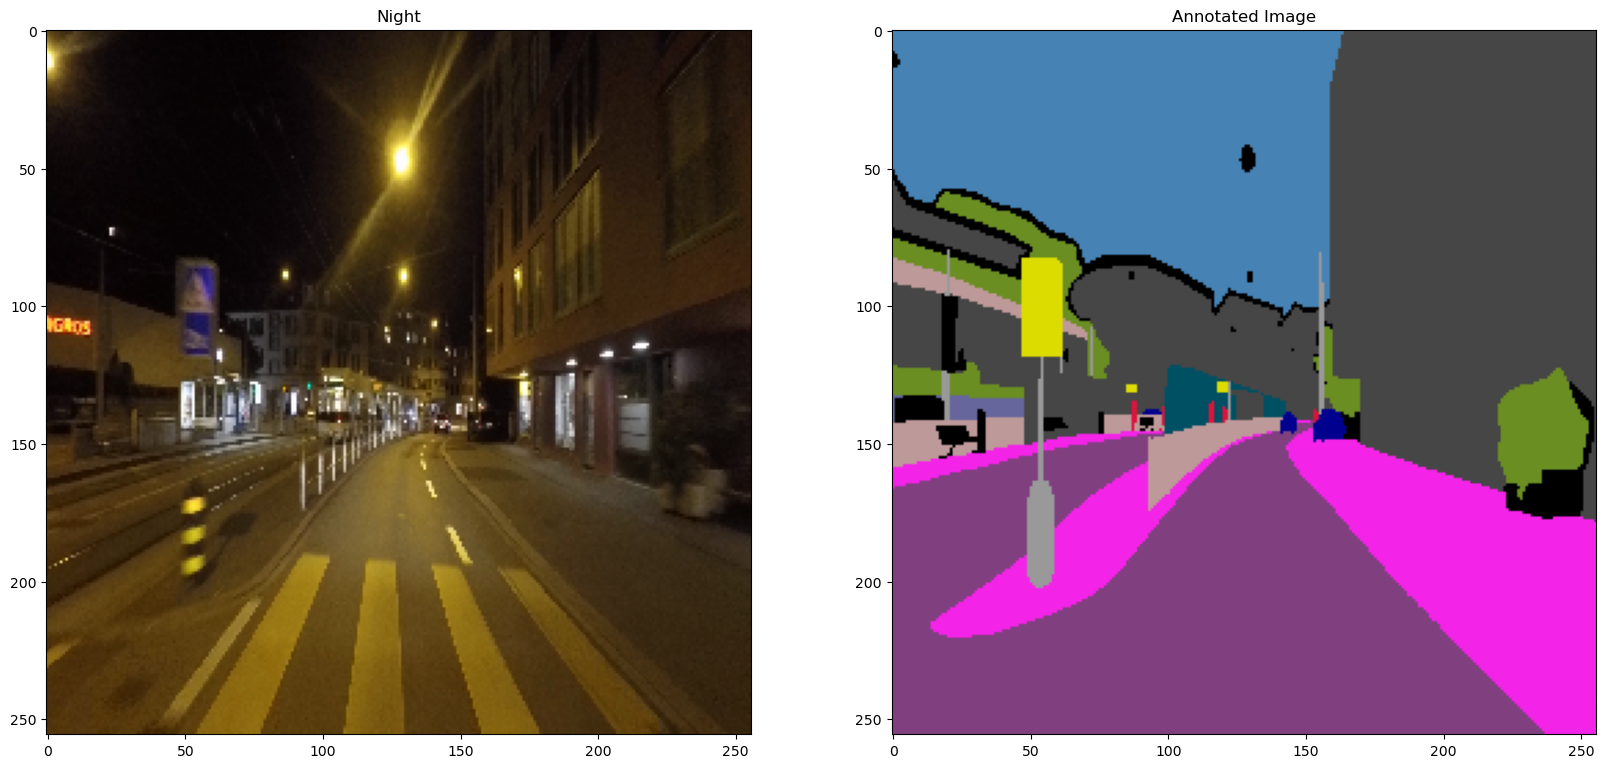

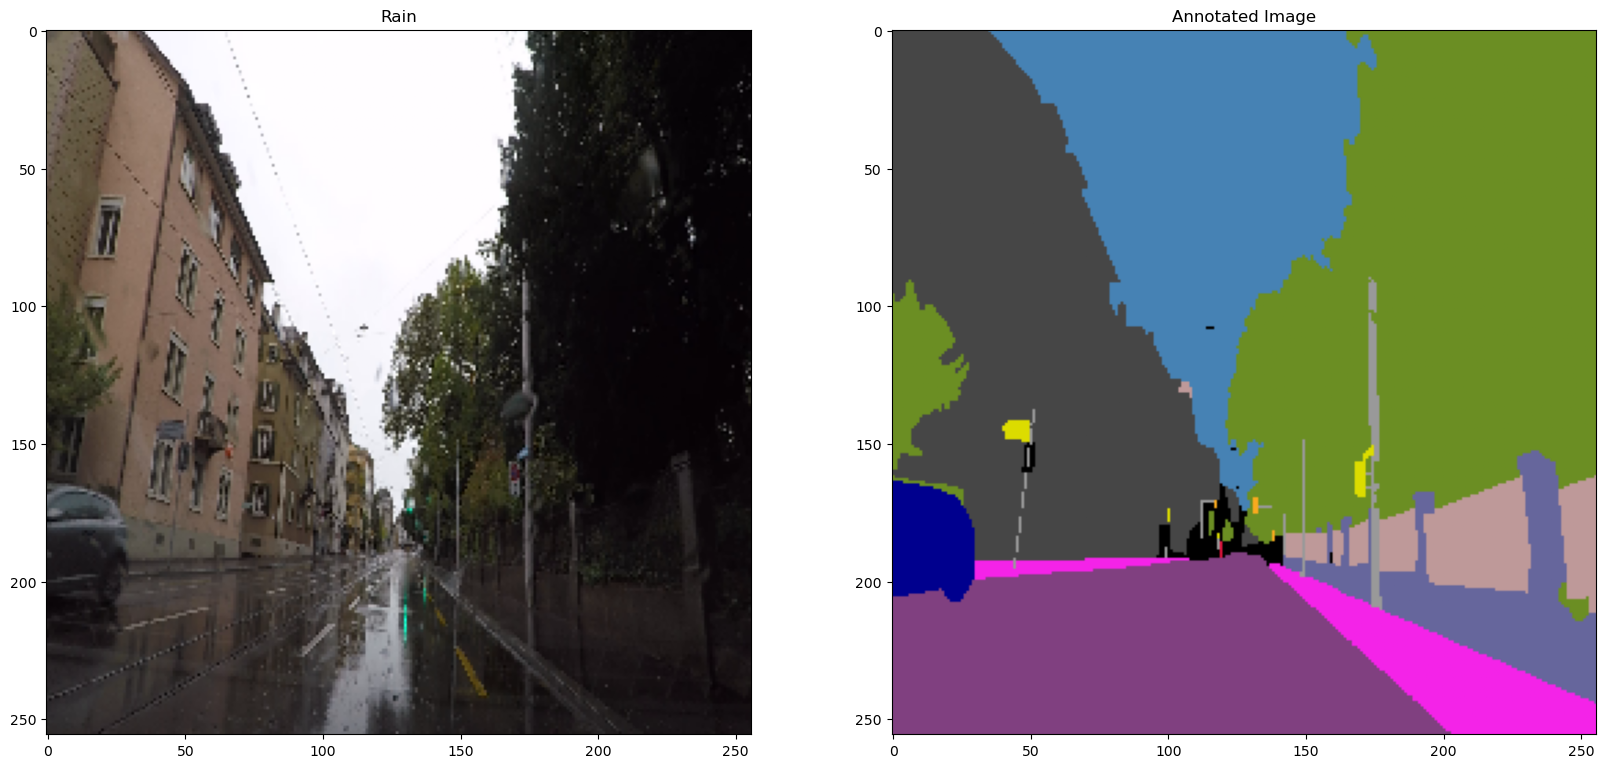

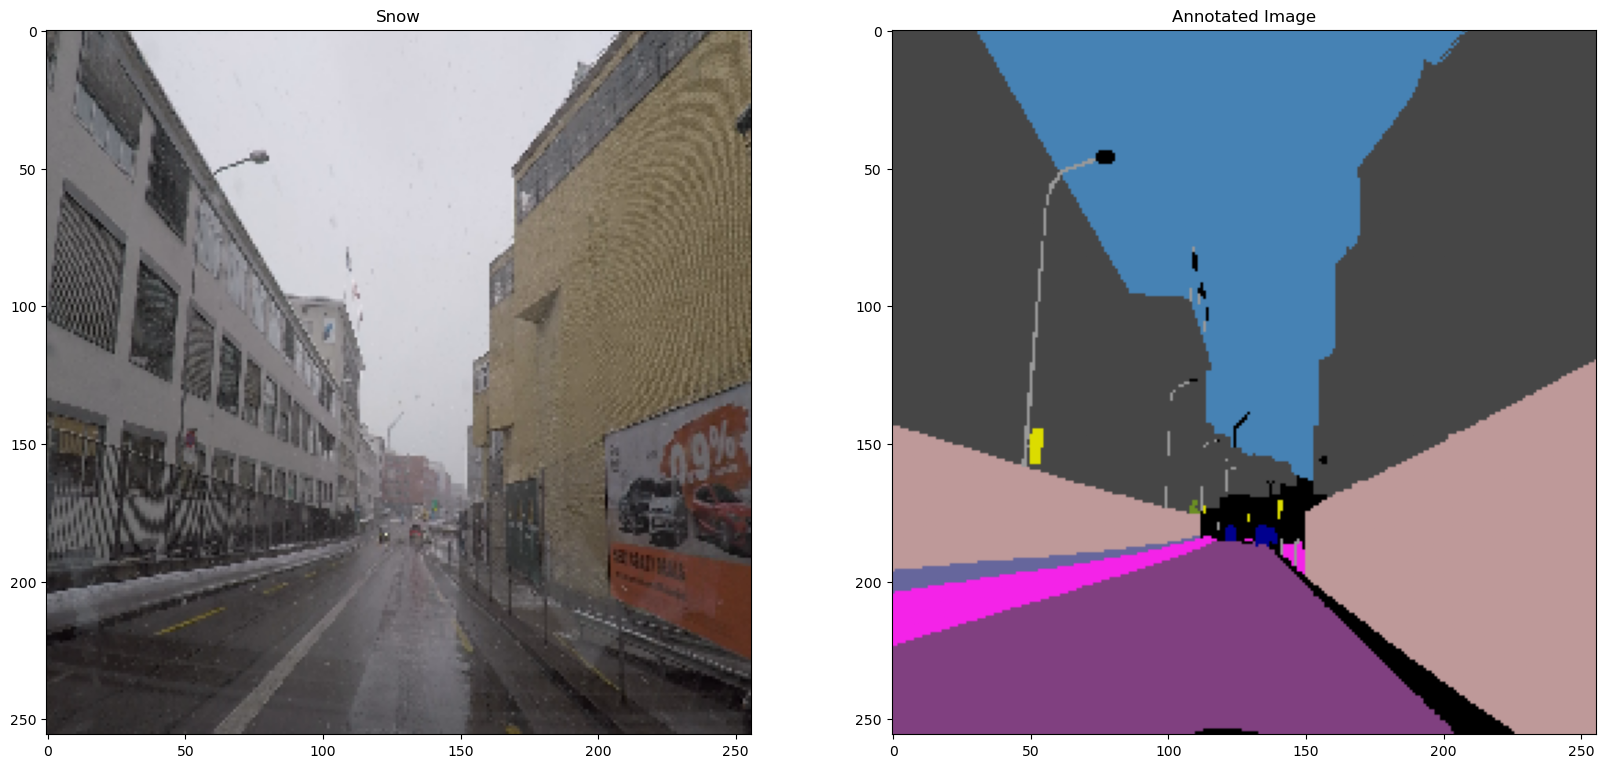

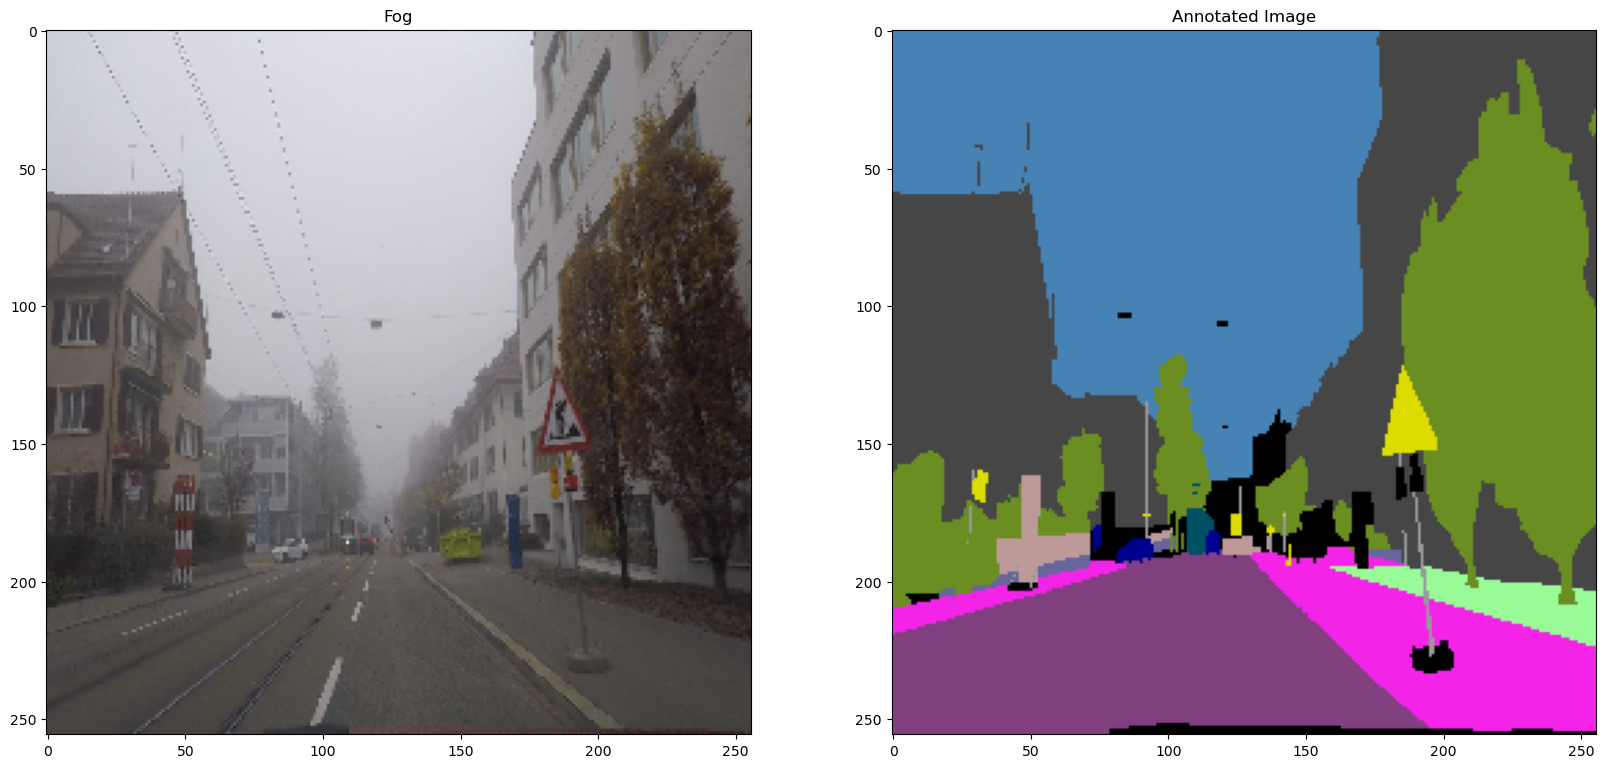

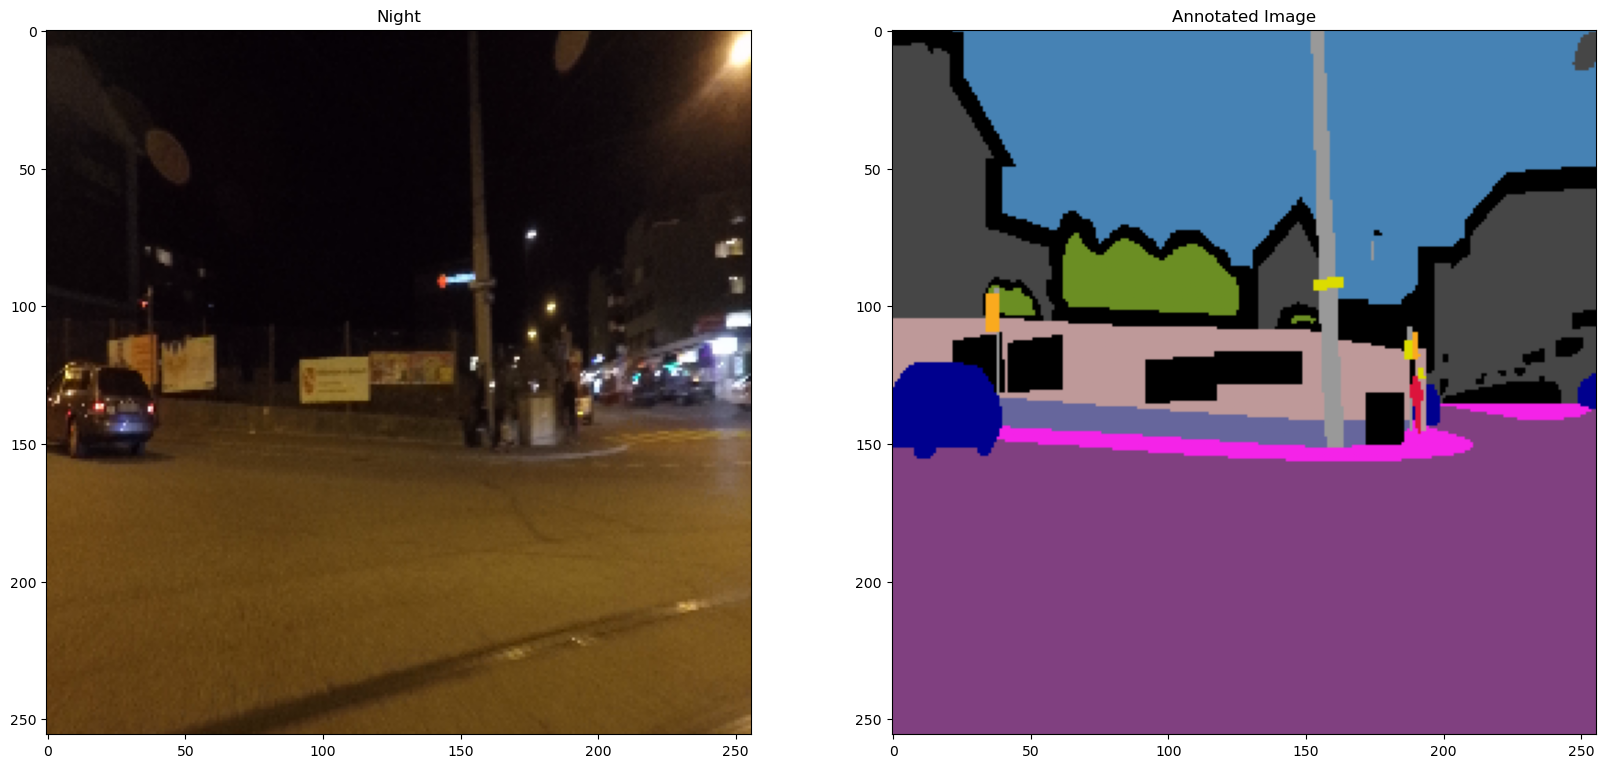

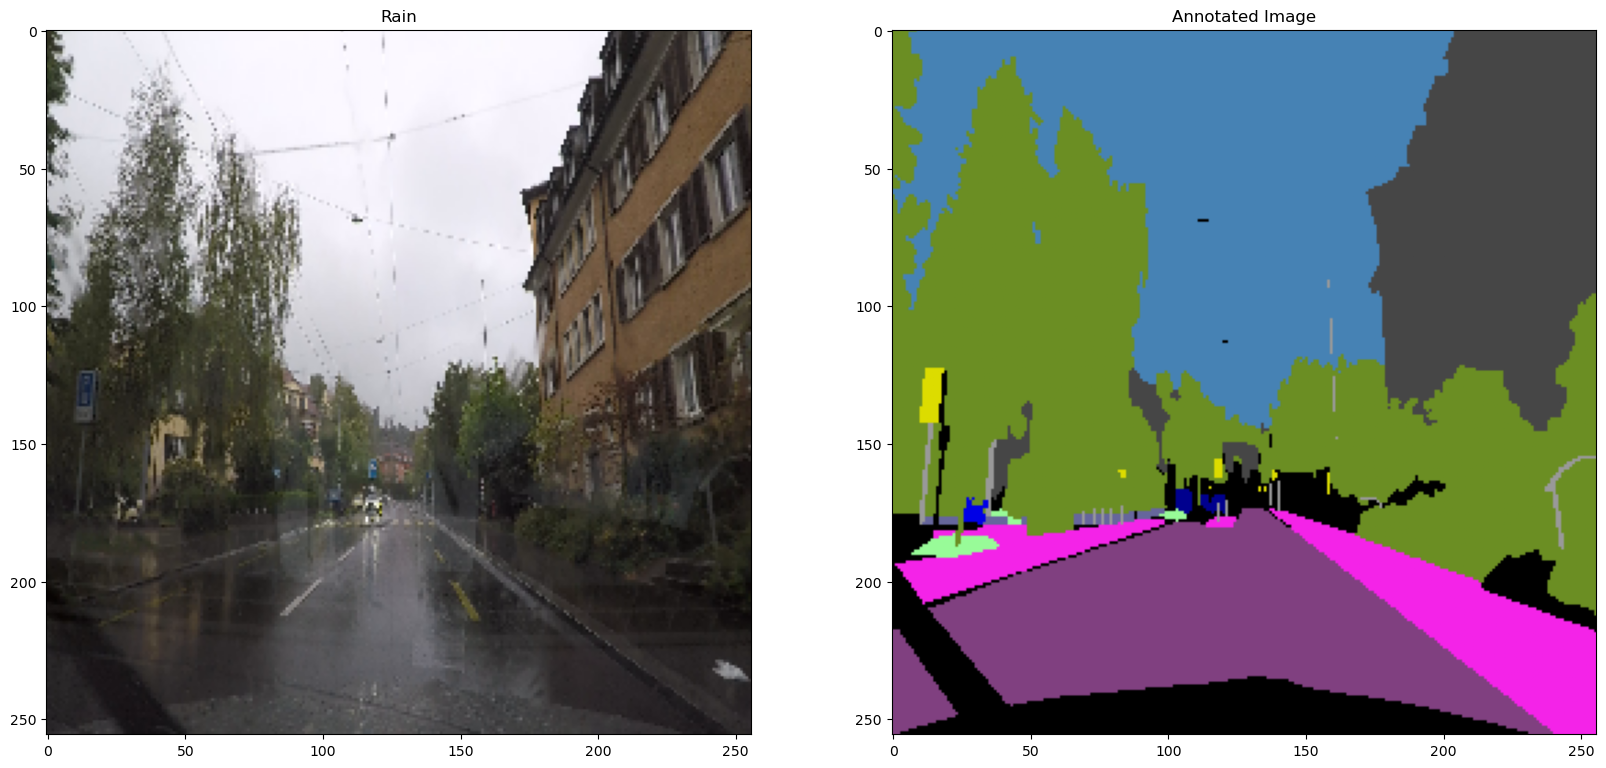

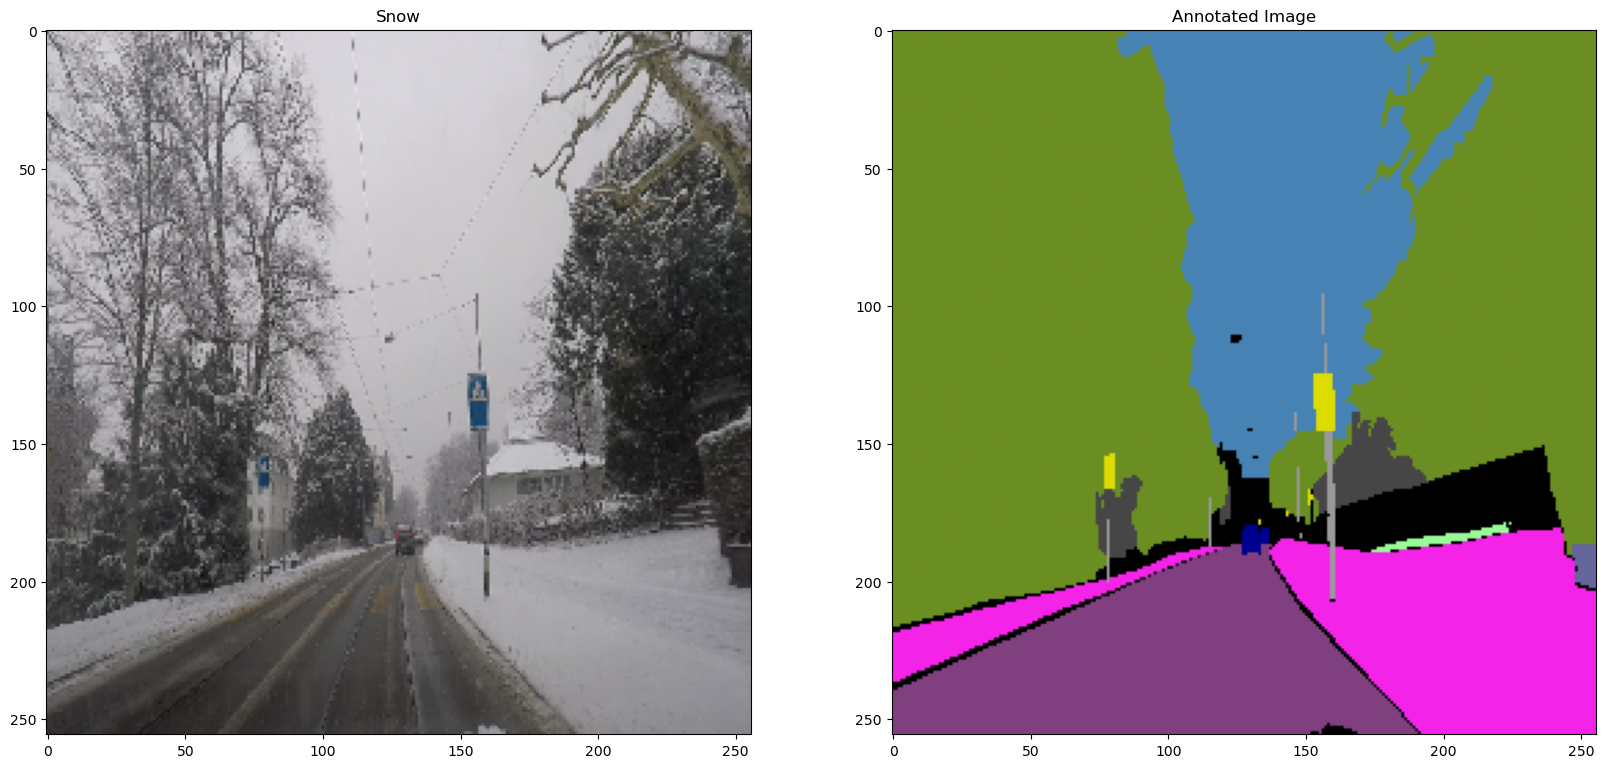

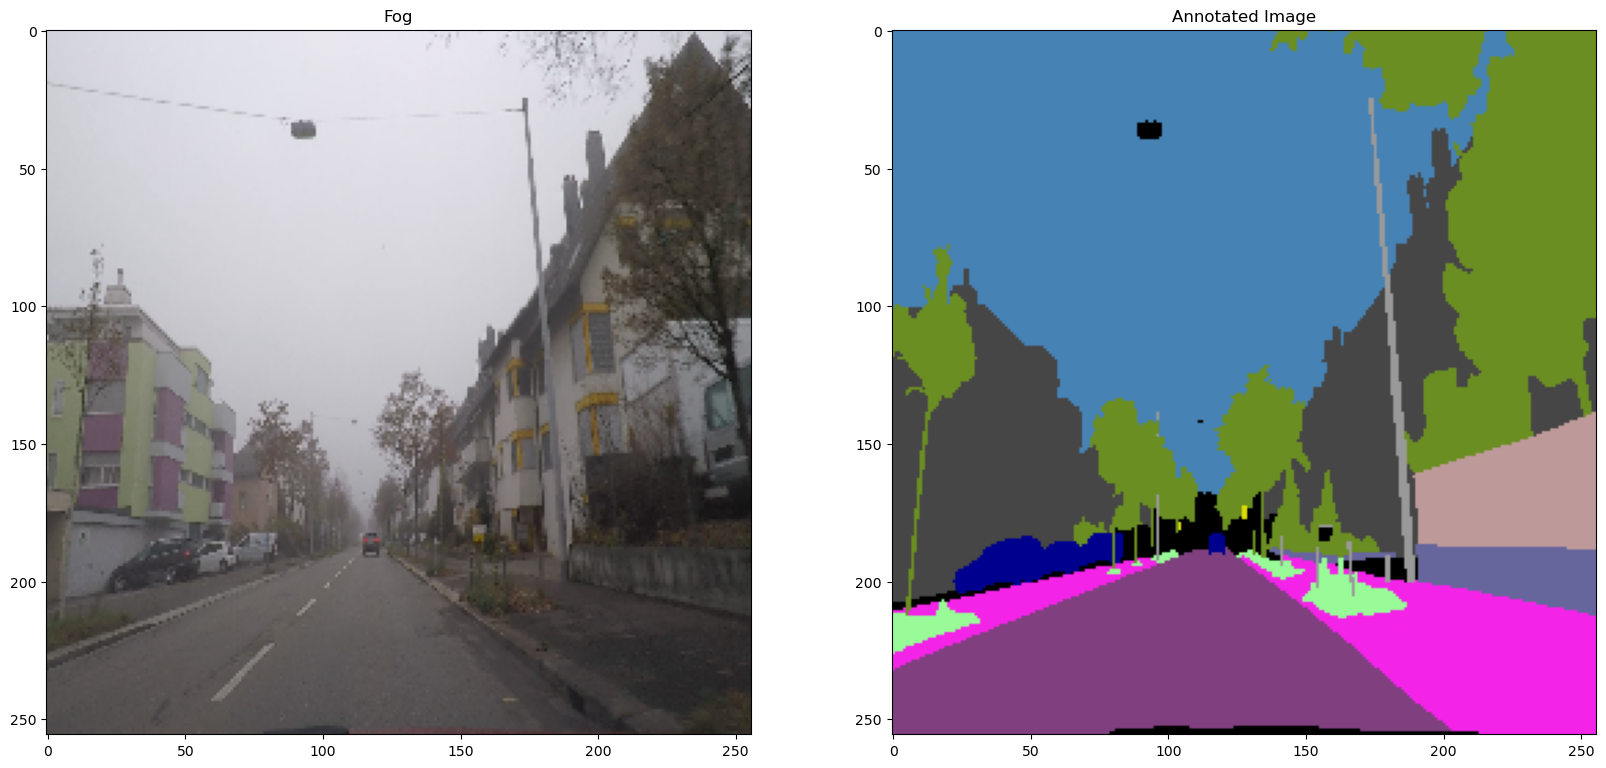

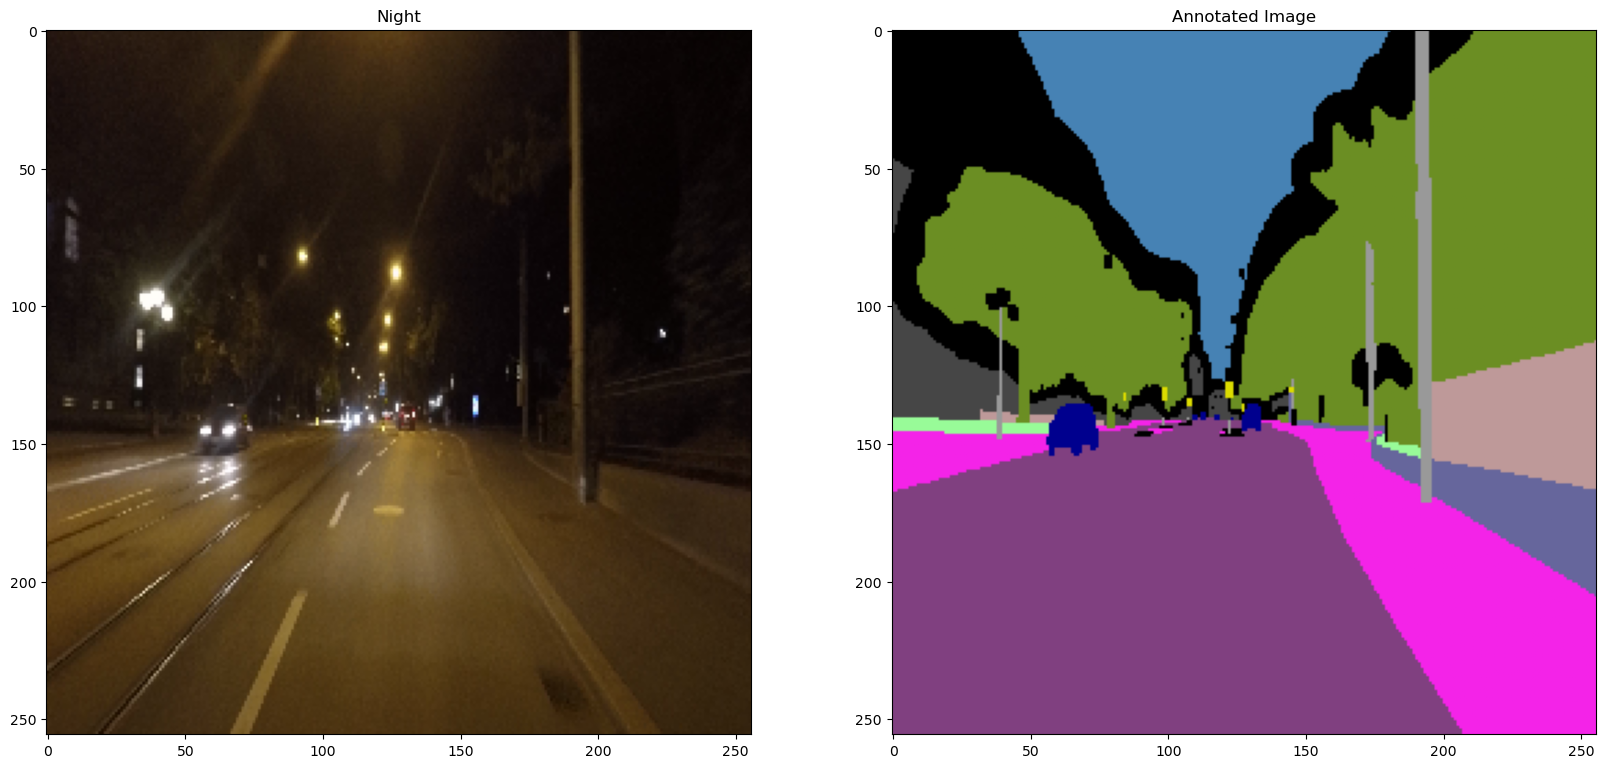

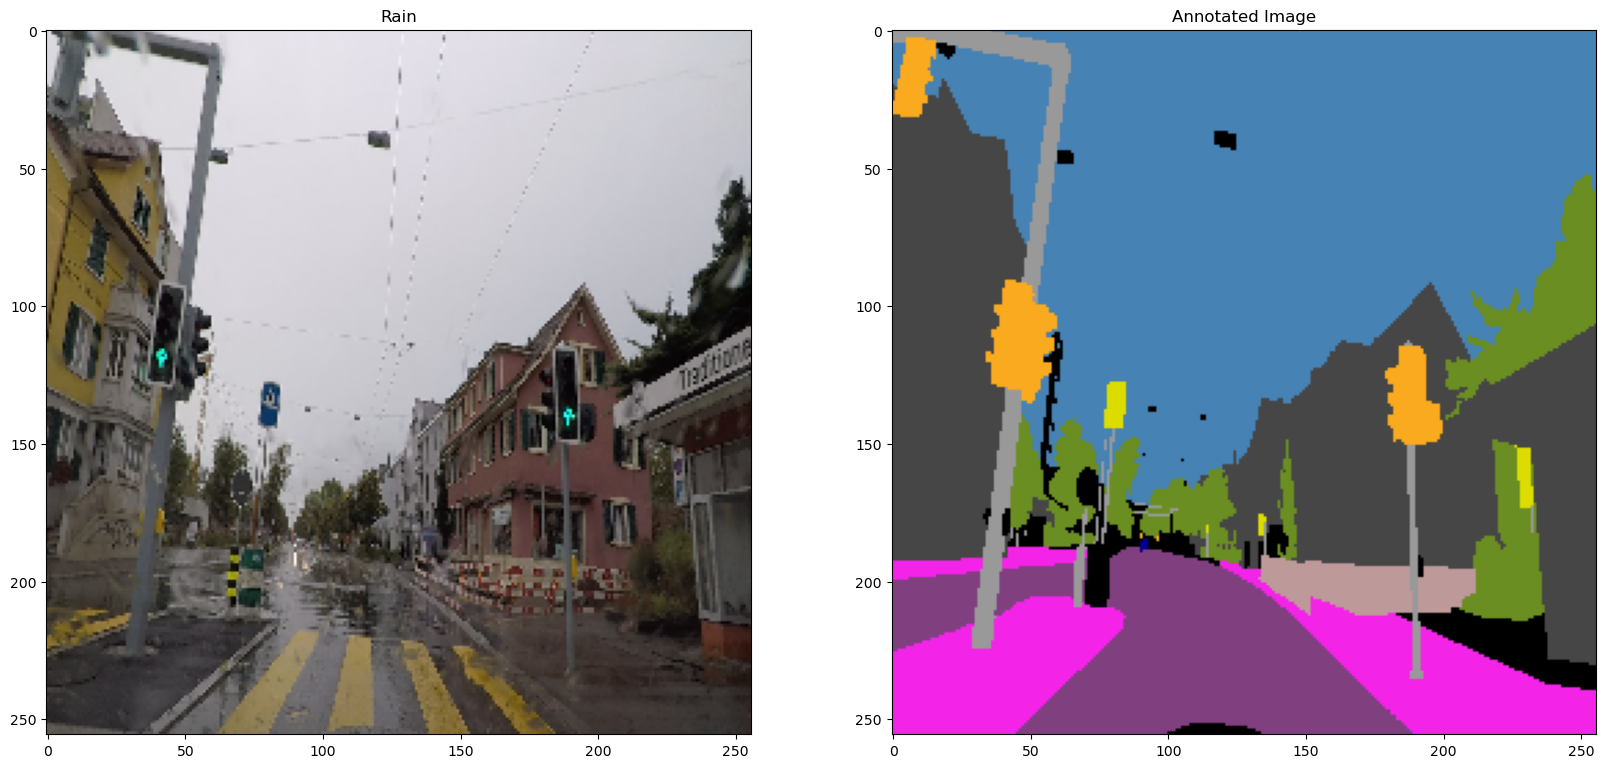

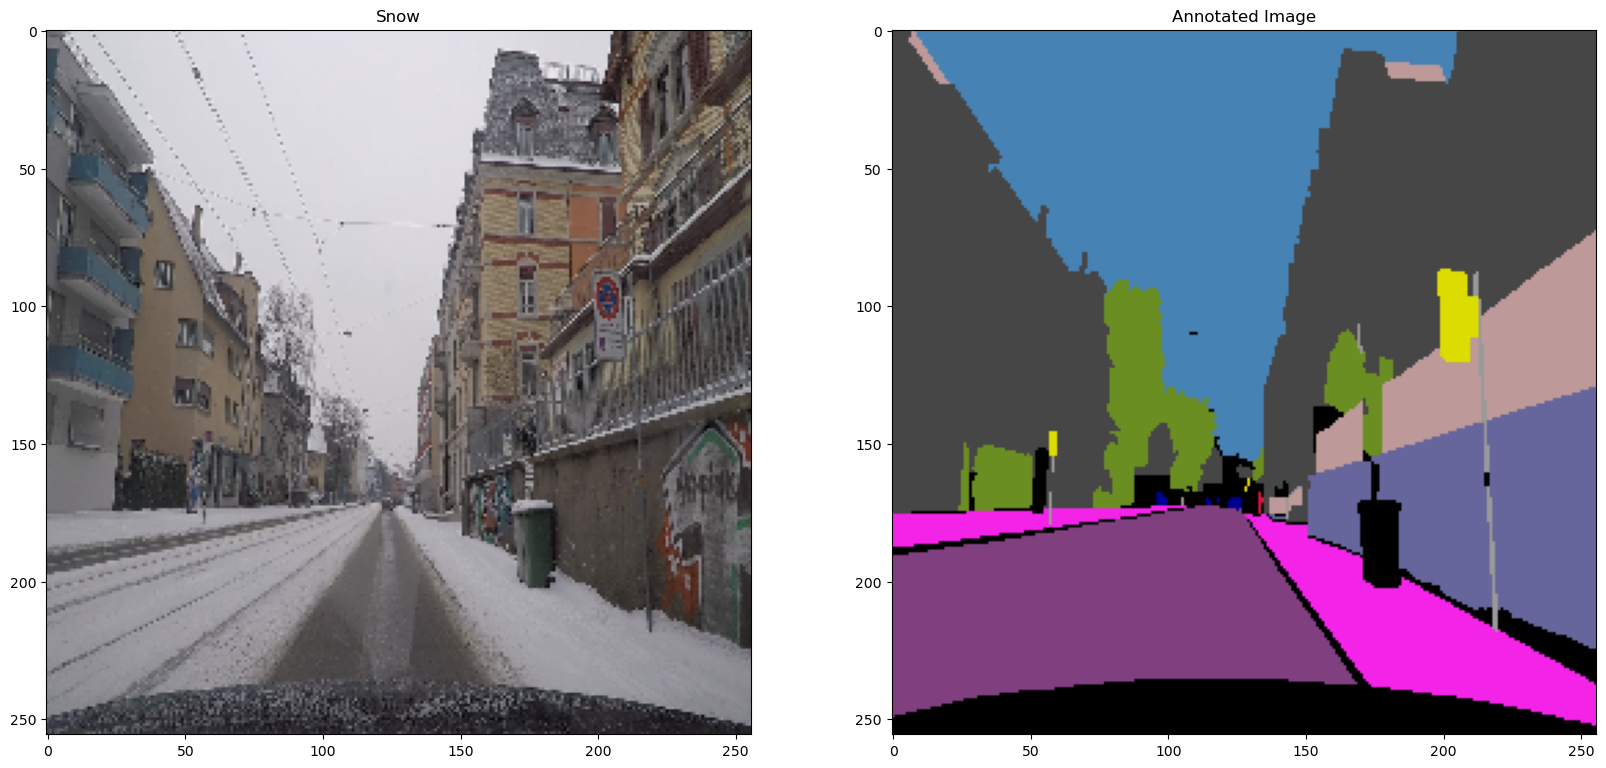

In [5]:
# Prints random rgb with annotations to make sure the right data is being used.

pictures = [fog_training_duo[6], night_training_duo[2], rain_training_duo[8], snow_training_duo[12],
           fog_testing_duo[9], night_testing_duo[15], rain_testing_duo[3], snow_testing_duo[11],
           fog_validation_duo[15], night_validation_duo[23], rain_validation_duo[21], snow_validation_duo[20]]

def show_sample(image, annotated_image, name):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    ax1.set_title(name)
    ax1.imshow(image / 255.)
    ax2.set_title('Annotated Image')
    ax2.imshow(annotated_image / 255.)

count = 1

for x in pictures:
    image = img_to_array(load_img(x[0], target_size=image_size))
    annotated_image = img_to_array(load_img(x[1], target_size =image_size))
    if count == 1:
        show_sample(image, annotated_image, 'Fog')
    elif count == 2:
        show_sample(image, annotated_image, 'Night')
    elif count == 3:
        show_sample(image, annotated_image, 'Rain')
    else:
        show_sample(image, annotated_image, 'Snow')
    if count == 4:
        count = 1
    else:
        count += 1

In [6]:
# Specify the class csv path in classes_df = pd.read_csv('PATH_HERE')

image_size = (256, 256)
classes_df = pd.read_csv("E:/Github/SemanticSegmentationOfLowVisibilityRoadways/segmentation/config/class_dict.csv")
classes = []
class_labels = []
for index, item in classes_df.iterrows():
    classes.append(np.array([item['r'], item['g'], item['b']]))
    class_labels.append(item['name'])
num_classes = len(classes)
classes

[array([0, 0, 0]),
 array([128,  64, 128]),
 array([244,  35, 232]),
 array([70, 70, 70]),
 array([102, 102, 156]),
 array([190, 153, 153]),
 array([153, 153, 153]),
 array([250, 170,  30]),
 array([220, 220,   0]),
 array([107, 142,  35]),
 array([152, 251, 152]),
 array([ 70, 130, 180]),
 array([220,  20,  60]),
 array([255,   0,   0]),
 array([  0,   0, 142]),
 array([ 0,  0, 70]),
 array([  0,  60, 100]),
 array([  0,  80, 100]),
 array([  0,   0, 230]),
 array([119,  11,  32])]

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, BatchNormalization, \
    Activation, Dropout


class UNet:
    def __init__(self, dimensions, channels, filters, n_classes):
        input_layer = Input(shape=(dimensions + (channels,)), name='input')

        conv_1_layer = self.__gen_convolution(input_layer, filters)
        conv_1_pooling = MaxPooling2D(pool_size=(2, 2))(conv_1_layer)

        conv_2_layer = self.__gen_convolution(conv_1_pooling, filters * 2)
        conv_2_pooling = MaxPooling2D(pool_size=(2, 2))(conv_2_layer)

        conv_3_layer = self.__gen_convolution(conv_2_pooling, filters * 4)
        conv_3_pooling = MaxPooling2D(pool_size=(2, 2))(conv_3_layer)

        conv_4_layer = self.__gen_convolution(conv_3_pooling, filters * 8)
        conv_4_pooling = MaxPooling2D(pool_size=(2, 2))(conv_4_layer)
        conv_4_dropout = Dropout(0.5)(conv_4_pooling)

        conv_5_layer = self.__gen_convolution(conv_4_dropout, filters * 16)
        conv_5_dropout = Dropout(0.5)(conv_5_layer)

        deconv_6_layer = self.__gen_deconvolution(conv_5_dropout, filters * 8, conv_4_layer)
        deconv_6_dropout = Dropout(0.5)(deconv_6_layer)

        deconv_7_layer = self.__gen_deconvolution(deconv_6_dropout, filters * 4, conv_3_layer)
        deconv_7_dropout = Dropout(0.5)(deconv_7_layer)

        deconv_8_layer = self.__gen_deconvolution(deconv_7_dropout, filters * 2, conv_2_layer)
        deconv_9_layer = self.__gen_deconvolution(deconv_8_layer, filters * 2, conv_1_layer)
        output_layer = Conv2D(filters=n_classes, kernel_size=(1, 1), activation='softmax')(deconv_9_layer)

        self.model = Model(inputs=input_layer, outputs=output_layer, name='UNet')

    def __gen_convolution(self, prev, filters):
        temp = Conv2D(filters=filters, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                         activation='relu')(prev)
        temp = BatchNormalization()(temp)
        temp = Conv2D(filters=filters, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal',
                         activation='relu')(temp)
        return BatchNormalization()(temp)

    def __gen_deconvolution(self, prev, filters, residual):
        temp = Conv2DTranspose(filters=filters, kernel_size=(3, 3), strides=(2, 2), padding='same')(prev)
        temp = concatenate([temp, residual], axis=3)
        return self.__gen_convolution(temp, filters)

In [19]:
from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from PIL import ImageFilter, ImageEnhance
import random

# Converts annotations from RGB to 2D -> Array of size image_size x image_size which contains each pixel -> Each pixel will hold a class value
def rgb_to_2D_classes(annotated, class_map):
    label = np.zeros(annotated.shape[:2], dtype=np.uint8)
    for i, rgb in enumerate(class_map):
        label[(annotated == rgb).all(axis=2)] = i
    return label

# https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
class DataGenerator(Sequence):
    'Generates data for Keras'

    def __init__(self, duo, classes, n_classes, condition, batch_size=4, dim=(128, 128), shuffle=True):
        'Initialization'
        self.dim = dim
        self.duo = duo
        self.classes = classes
        self.n_classes = n_classes
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.condition = condition
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.duo) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Find list of IDs
        list_IDs_temp = [k for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.duo))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples'  # X : (n_samples, *dim, n_channels)
        # Initialization
        X = []
        y = []

        # Generate data
        for i in list_IDs_temp:
            # Store sample
            original_image = load_img(self.duo[i][0], target_size=self.dim)
            img = img_to_array(original_image) / 255. # Image to numpy array -> / 255. to get array values between 0 and 1
            img2 = np.fliplr(img)
            X.append(img)
            X.append(img2)

            label = load_img(self.duo[i][1], target_size=self.dim)
            label = img_to_array(label)
            label2 = np.fliplr(label)
            label = rgb_to_2D_classes(label, self.classes)
            label2 = rgb_to_2D_classes(label2, self.classes)
            label = to_categorical(label, num_classes=self.n_classes) # Converts to binary class matrix
            label2 = to_categorical(label2, num_classes=self.n_classes)
            y.append(label)
            y.append(label2)
            
            if (random.choice([True, False])) and (self.condition != 'fog'):
                # Additional augmentations to prevent overfitting
                if condition == 'rain': 
                    temp = original_image.filter(ImageFilter.GaussianBlur(radius = 5)) # Blur
                    X.append(temp)
                    y.append(label)
                elif condition == 'snow':
                    temp = original_image
                    for i in range( round(temp.size[0]*temp.size[1]/5) ): # Noise
                        temp.putpixel(
                        (random.randint(0, temp.size[0]-1), random.randint(0, temp.size[1]-1)),
                        (random.randint(0,255),random.randint(0,255),random.randint(0,255))
                        )
                    X.append(temp)
                    y.append(label)
                elif condition == 'night':
                    temp = ImageEnhance.Brightness(original_image) # Darker
                    temp = temp.enhance(0.5)
                    X.append(temp)
                    y.append(label)
                

        return np.array(X), np.array(y)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, TensorBoard

#fog_model = keras.models.load_model("E:/Model To Pre-Train/saved_model") -> Load previous model

fog_model = UNet(image_size, 3, 64, num_classes).model
#for idx, x in enumerate(fog_model.layers[0].layers):
#    if 'conv' in x.name and idx > 28:
#        x.trainable = True

fog_model.compile(optimizer='adamax', loss='categorical_crossentropy' ,metrics=['accuracy', keras.metrics.OneHotMeanIoU(num_classes=num_classes)])

fog_my_callbacks = [
    CSVLogger("./fog/logs/log.csv", separator=",", append=False),
    ModelCheckpoint(filepath='./fog/fog-weights.h5', save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
    TensorBoard(log_dir='./fog/logs')
]

fog_training_data = DataGenerator(fog_training_duo+fog_testing_duo,classes,num_classes,batch_size=3, dim=image_size ,shuffle=True, condition='fog')
fog_training_steps = fog_training_data.__len__()

fog_validation_data = DataGenerator(fog_validation_duo,classes,num_classes,batch_size=3, dim=image_size ,shuffle=True, condition='fog')
fog_validation_steps = fog_validation_data.__len__()

fog_model_train = fog_model.fit(fog_training_data, epochs=1, callbacks=fog_my_callbacks, validation_data=fog_validation_data, steps_per_epoch=fog_training_steps, validation_steps=fog_validation_steps)

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, TensorBoard

# night_model = keras.models.load_model("E:/Model To Pre-Train/saved_model") -> Load previous model

night_model = UNet(image_size, 3, 64, num_classes).model
#for idx, x in enumerate(night_model.layers[0].layers):
#    if 'conv' in x.name and idx > 28:
#        x.trainable = True

night_model.compile(optimizer='adamax', loss='categorical_crossentropy' ,metrics=['accuracy', keras.metrics.OneHotMeanIoU(num_classes=num_classes)])

night_my_callbacks = [
    CSVLogger("./night/logs/log.csv", separator=",", append=False),
    ModelCheckpoint(filepath='./night/night-weights.h5', save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
    TensorBoard(log_dir='./night/logs')
]

night_training_data = DataGenerator(night_training_duo+night_testing_duo,classes,num_classes,batch_size=3, dim=image_size ,shuffle=True, condition='night')
night_training_steps = night_training_data.__len__()

night_validation_data = DataGenerator(night_validation_duo,classes,num_classes,batch_size=3, dim=image_size ,shuffle=True, condition='night')
night_validation_steps = night_validation_data.__len__()

night_model_train = night_model.fit(night_training_data, epochs=300, callbacks=night_my_callbacks, validation_data=night_validation_data, steps_per_epoch=night_training_steps, validation_steps=night_validation_steps)

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, TensorBoard

# rain_model = keras.models.load_model("E:/Model To Pre-Train/saved_model") -> Load previous model

rain_model = UNet(image_size, 3, 64, num_classes).model
#for idx, x in enumerate(rain_model.layers[0].layers):
#    if 'conv' in x.name and idx > 28:
#        x.trainable = True

rain_model.compile(optimizer='adamax', loss='categorical_crossentropy' ,metrics=['accuracy', keras.metrics.OneHotMeanIoU(num_classes=num_classes)])

rain_my_callbacks = [
    CSVLogger("./rain/logs/log.csv", separator=",", append=False),
    ModelCheckpoint(filepath='./rain/rain-weights.h5', save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
    TensorBoard(log_dir='./rain/logs')
]

rain_training_data = DataGenerator(rain_training_duo+rain_testing_duo,classes,num_classes,batch_size=3, dim=image_size ,shuffle=True, condition='rain')
rain_training_steps = rain_training_data.__len__()

rain_validation_data = DataGenerator(rain_validation_duo,classes,num_classes,batch_size=3, dim=image_size ,shuffle=True, condition='rain')
rain_validation_steps = rain_validation_data.__len__()

rain_model_train = rain_model.fit(rain_training_data, epochs=300, callbacks=rain_my_callbacks, validation_data=rain_validation_data, steps_per_epoch=rain_training_steps, validation_steps=rain_validation_steps)

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, TensorBoard

# snow_model = keras.models.load_model("E:/Model To Pre-Train/saved_model") -> Load previous model

snow_model = UNet(image_size, 3, 64, num_classes).model
#for idx, x in enumerate(snow_model.layers[0].layers):
#    if 'conv' in x.name and idx > 28:
#        x.trainable = True

snow_model.compile(optimizer='adamax', loss='categorical_crossentropy' ,metrics=['accuracy', keras.metrics.OneHotMeanIoU(num_classes=num_classes)])

snow_my_callbacks = [
    CSVLogger("./snow/logs/log.csv", separator=",", append=False),
    ModelCheckpoint(filepath='./snow/snow-weights.h5', save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
    TensorBoard(log_dir='./snow/logs')
]

snow_training_data = DataGenerator(snow_training_duo+snow_testing_duo,classes,num_classes,batch_size=3, dim=image_size ,shuffle=True, condition='snow')
snow_training_steps = snow_training_data.__len__()

snow_validation_data = DataGenerator(snow_validation_duo,classes,num_classes,batch_size=3, dim=image_size ,shuffle=True, condition='snow')
snow_validation_steps = snow_validation_data.__len__()

snow_model_train = snow_model.fit(snow_training_data, epochs=300, callbacks=snow_my_callbacks, validation_data=snow_validation_data, steps_per_epoch=snow_training_steps, validation_steps=snow_validation_steps)

In [ ]:
# Calulate IOU for each semantic class
from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Converts annotations from RGB to 2D -> Array of size image_size x image_size which contains each pixel -> Each pixel will hold a class value
def rgb_to_2D_classes(annotated, class_map):
    label = np.zeros(annotated.shape[:2], dtype=np.uint8)
    for i, rgb in enumerate(class_map):
        label[(annotated == rgb).all(axis=2)] = i
    return label

def convert_to_labels(rgbto2Dclassesarray, class_labels):
    labels = []
    for x in rgbto2Dclassesarray:
        temp = []
        for arr in x:
            temp.append(class_labels[arr])
        labels.append(temp)
    return labels

items = [fog_validation_duo, night_validation_duo, rain_validation_duo, snow_validation_duo]
#items = [fog_training_duo+fog_testing_duo, night_training_duo+night_testing_duo, rain_training_duo+rain_testing_duo, 
        #snow_training_duo+snow_testing_duo]
models = [fog_model, night_model, rain_model, snow_model]
names = ['Fog', 'Night', 'Rain', 'Snow']
for list_idx, dataset in enumerate(items):
    mean_iou_classes = []
    mean_IOU_state = None
    for i in dataset:
        img = load_img(i[0], target_size=(256, 256)) # Get original rgb image to pass in model
        annotated_img = load_img(i[1], target_size=(256, 256)) # Annotated image from dataset
        annotated_img = img_to_array(annotated_img)
        annotated_img = rgb_to_2D_classes(annotated_img, classes) # Converts annotated image array values to the classes we have
        img_expanded = np.expand_dims(img_to_array(img) / 255., axis=0) 
        prediction = np.argmax(models[list_idx].predict(img_expanded)[0], axis=2) # Annotated prediction from model
        m_IOU = keras.metrics.MeanIoU(num_classes=num_classes)
        m_IOU.update_state(annotated_img, prediction)
        if mean_IOU_state == None:
            mean_IOU_state = m_IOU
        else:
            mean_IOU_state.merge_state([m_IOU])
        for idx, x in enumerate(classes): # Go through all classes, idx is the class
            m = keras.metrics.IoU(num_classes=num_classes, target_class_ids=[idx])
            m.update_state(annotated_img, prediction)
            iou_result = m.result().numpy() 
            if len(mean_iou_classes) <= idx:
                mean_iou_classes.append(m)
            else:
                prev = mean_iou_classes[idx]
                m.merge_state([prev])
                mean_iou_classes[idx] = m
    print(names[list_idx] + ' Mean IOU Validation:' + str(mean_IOU_state.result().numpy()))
    for idx, x in enumerate(class_labels):
        print(x + ': ' + str(mean_iou_classes[idx].result().numpy())) # print IOU for each class
    print('-----------------------')

In [13]:
fog_model.save('./fog/fog_saved_model')
night_model.save('./night/night_saved_model')
rain_model.save('./rain/rain_saved_model')
snow_model.save('./snow/snow_saved_model')

INFO:tensorflow:Assets written to: ./fog/fog_saved_model\assets


INFO:tensorflow:Assets written to: ./fog/fog_saved_model\assets


INFO:tensorflow:Assets written to: ./night/night_saved_model\assets


INFO:tensorflow:Assets written to: ./night/night_saved_model\assets


INFO:tensorflow:Assets written to: ./rain/rain_saved_model\assets


INFO:tensorflow:Assets written to: ./rain/rain_saved_model\assets


INFO:tensorflow:Assets written to: ./snow/snow_saved_model\assets


INFO:tensorflow:Assets written to: ./snow/snow_saved_model\assets


In [12]:
fog_prediction = Predict(image_size, fog_model, classes)
night_prediction = Predict(image_size, night_model, classes)
rain_prediction = Predict(image_size, rain_model, classes)
snow_prediction = Predict(image_size, snow_model, classes)

In [ ]:
for x in range(0, 1):
    fog_prediction.predict(fog_training_duo[x])
    night_prediction.predict(night_training_duo[x])
    rain_prediction.predict(rain_training_duo[x])
    snow_prediction.predict(snow_training_duo[x])

In [ ]:
for x in range(0, 1):
    fog_prediction.predict(fog_validation_duo[x])
    night_prediction.predict(night_validation_duo[x])
    rain_prediction.predict(rain_validation_duo[x])
    snow_prediction.predict(snow_validation_duo[x])